<a href="https://colab.research.google.com/github/mwd1987/DataScience/blob/master/Doolittle_HW02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 2

**Due 9/15/2020.**


## References

+ Lectures 3-6 (inclusive).

## Instructions

+ Type your name and email in the "Student details" section below.
+ Develop the code and generate the figures you need to solve the problems using this notebook.
+ For the answers that require a mathematical proof or derivation you can either:
    
    - Type the answer using the built-in latex capabilities. In this case, simply export the notebook as a pdf and upload it on gradescope; or
    - You can print the notebook (after you are done with all the code), write your answers by hand, scan, turn your response to a single pdf, and upload on gradescope.


**Note**: Please match all the pages corresponding to each of the questions when you submit on gradescope.

## Student details

+ **First Name:**Matthew
+ **Last Name:**Doolittle
+ **Email:**mdoolit@purdue.edu

In [110]:
# Here are some modules that you may need - please run this block of code:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('paper')
import numpy as np
import scipy
import scipy.stats as st
# A helper function for downloading files
import requests
import os
def download(url, local_filename=None):
    """
    Downloads the file in the ``url`` and saves it in the current working directory.
    """
    data = requests.get(url)
    if local_filename is None:
        local_filename = os.path.basename(url)
    with open(local_filename, 'wb') as fd:
        fd.write(data.content)

## Problem 1 - Practice with discrete random variables

Consider the Categorical random variable:
$$
X \sim \operatorname{Categorical}(0.3, 0.1, 0.2, 0.4),
$$
taking values in $\{0,1,2,3\}$. Find the following (you may use ``scipy.stats.rv_discrete`` or do it by hand):

A. The expectation $\mathbb{E}[X]$.

**Answer:**
<br><br>

Expectation of X= 1.7


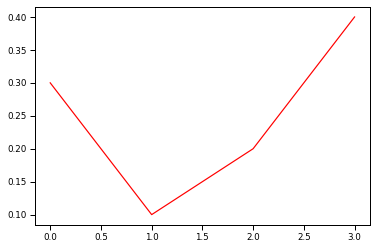

In [111]:
Xk=np.arange(4)
pk=(0.3,0.1,0.2,0.4)
Prob1 = st.rv_discrete(name='Prob1', values=(Xk, pk))
plt.plot(Xk,pk,'r')
Expectation=Xk[0]*pk[0]+Xk[1]*pk[1]+Xk[2]*pk[2]+Xk[3]*pk[3]
ExpX=np.round(Expectation, decimals=5,out=None)
print("Expectation of X=",ExpX)

B. The variance $\mathbb{V}[X]$.

**Answer:**
<br><br>

In [112]:
#Given Xk and pk

ExpX2=Xk[1]*pk[1]+(Xk[2]**2)*pk[2]+(Xk[3]**2)*pk[3]
Var=ExpX2-(ExpX**2)
Varx=np.round(Var,decimals=5,out=None)
print("Variance of X=\n",Varx)
# Simpler method would be using rv.discrete function from scipy stats with X.var()
# Will use this code in the future, this current method is more "by hand" to practice arrays

Variance of X=
 1.61


C. Plot the probability mass function of $X$.

Probability Mass Function of X is: 
 [0.3 0.1 0.2 0.4]


Text(0, 0.5, '$p(x)$')

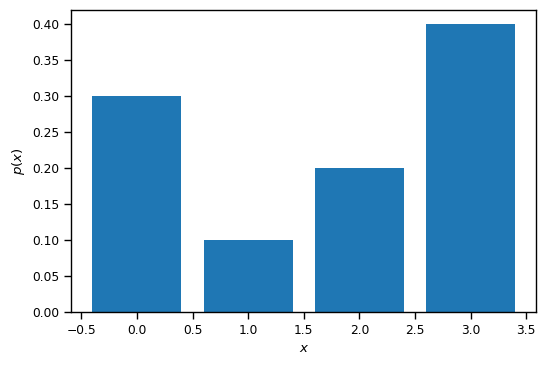

In [113]:
X = st.rv_discrete(name='HWCategorical', values=(Xk, pk))
print("Probability Mass Function of X is: \n",X.pmf(Xk))
fig, ax = plt.subplots(dpi=100)
ax.bar(Xk, X.pmf(Xk))
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')

D. Find the probability that $X$ is in $\{0, 2\}$.

**Answer:**
<br><br>

In [114]:
xprob=X.pmf(0)+X.pmf(1)+X.pmf(2)
Xprob=np.round(xprob,decimals=5,out=None)
print("Probability of X in {0,2} given by:", Xprob)

Probability of X in {0,2} given by: 0.6


E. Find $\mathbb{E}[4X + 3]$.

**Answer:**
<br><br>

In [115]:
  # 𝔼[4𝑋+3]=𝔼[4𝑋]=4𝔼[𝑋]+3
  ExpPartE=4*(X.expect())+3
  print("E[4X+3]=\n",ExpPartE)

E[4X+3]=
 9.8


F. Find $\mathbb{V}[4X+3]$.

**Answer:**
<br><br>

In [116]:
V=(4**2)*X.var()
Var=np.round(V,decimals=5,out=None)
print("V[4X+3]=\n", Var)

V[4X+3]=
 25.76


## Problem 2 - Predicting the probability of major earthquakes in Southern California

The [San Andreas fault](https://en.wikipedia.org/wiki/San_Andreas_Fault) extends through California forming the boundary between the Pacific and the North American tectonic plates.
It has caused some of the major earthquakes on Earth.
We are going to focus on Southern California and we would like to assess the probability of a major earthquake, defined as an earthquake of magnitude 6.5 or greater, during the next ten years.

A. The first thing we are going to do is go over a [database of past earthquakes](https://scedc.caltech.edu/significant/chron-index.html) that have occured in Southern California and collect the relevant data. We are going to start at 1900 because data before that time may are unreliable.
Go over each decade and count the occurence of a major earthquake (i.e., count the number of organge and red colors in each decade). We have done this for you.

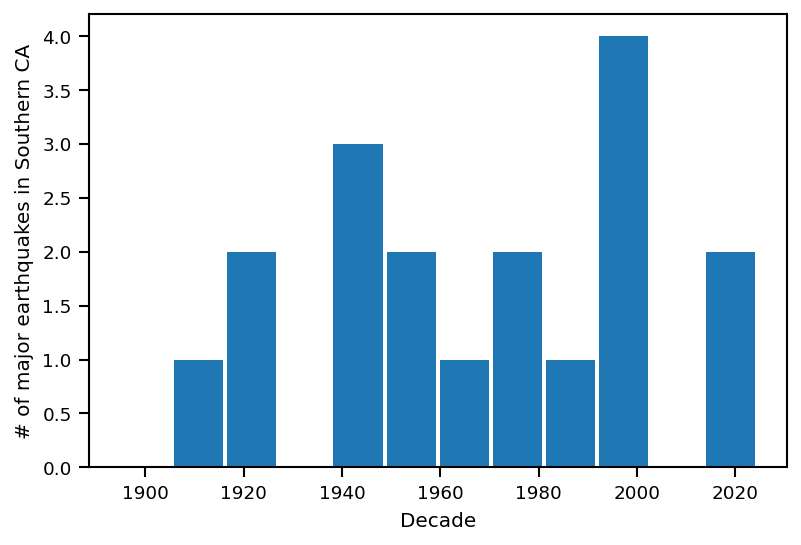

In [117]:
eq_data = np.array([
    0, # 1900-1909
    1, # 1910-1919
    2, # 1920-1929
    0, # 1930-1939
    3, # 1940-1949
    2, # 1950-1959
    1, # 1960-1969
    2, # 1970-1979
    1, # 1980-1989
    4, # 1990-1999
    0, # 2000-2009
    2 # 2010-2019 
])
fig, ax = plt.subplots(dpi=150)
ax.bar(np.linspace(1900, 2019, eq_data.shape[0]), eq_data, width=10)
ax.set_xlabel('Decade')
ax.set_ylabel('# of major earthquakes in Southern CA');

B. The [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution) is a discrete distribution with values $\{0,1,2,\dots\}$ which is commonly used to model the number of events occuring in a certain time period.
It is the right choice when these events are happening independently and the probability of any event happening over a small period of time is constant.
Let's use the Poisson to model the number of earthquakes $X$ occuring in a decade.
We write:
$$
X \sim \operatorname{Poisson}(r),
$$
where $r$ is the *rate parameter* of Poisson.
The rate is the number of events per time period.
Here, $r$ is the number of earthquakes per decade.
Using the data above, we can set the rate as the empirical average of the observed number of earthquakes per decade:

In [118]:
r = np.mean(eq_data)
print('r = {0:1.2f} major earthquakes per decade'.format(r))

r = 1.50 major earthquakes per decade


Strictly speaking, **this is not how you should be calibrating models!!!**
We will learn about the **right** way (which uses Bayes' rule) in the subsequent lectures.
But it will do for now as the answer you would get using the **right** way is, for this problem, almost the same.
Let's define a Poisson distribution using ``scipy.stats.poisson`` (see documentation [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html)):

In [119]:
X = st.poisson(r)
from scipy.stats import poisson

A. Plot the probability mass function of ``X``.

Text(0, 0.5, 'Probability of certain # of earthquakes')

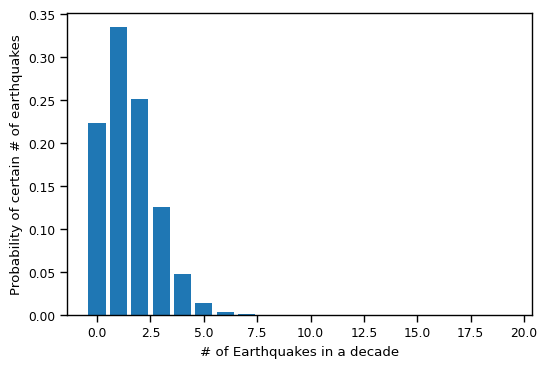

In [120]:

k=np.arange(20)
#number of bins or instances
#r=1.50
fig, ax = plt.subplots(dpi=100)
ax.bar(k, X.pmf(np.arange(20)))
ax.set_xlabel('# of Earthquakes in a decade')
ax.set_ylabel('Probability of certain # of earthquakes')


B. What is the probability that at least one major earthquake will occur during the next decade?<br>
**Answer:**
<br><br><br><br><br><br><br><br>

In [121]:
#Probability of one or more can be P(1>inf) or 1-P(0)
#Given that some of all probabilities is equal to one
P_0=X.pmf(0) # Probability of no earthquakes in a decade
P0=np.round(P_0,decimals=5,out=None)
print("Probability of no earthquakes in a decade given by", P0)
P1ormore=1-P0 #Sum of total probability minus P(0)
Answer=np.round(P1ormore,decimals=5,out=None)
print('Probability of at least one = 1 - p(0) by obvious rule, which equals:\n',Answer)

Probability of no earthquakes in a decade given by 0.22313
Probability of at least one = 1 - p(0) by obvious rule, which equals:
 0.77687


C. What is the probability that at least one major earthquake will occur during the next two decades?
Hint: Consider two independent and identical copies of $X$, say $X_1$ and $X_2$.
And consider their sum $Y = X_1 + X_2$. Read [this](https://en.wikipedia.org/wiki/Poisson_distribution#Sums_of_Poisson-distributed_random_variables) about the sum of two independent Poisson distributions.
<br>
**Answer:**
<br><br><br><br><br><br><br><br>

Probability of at least one earthquake in 2 decades given by:
 0.95021


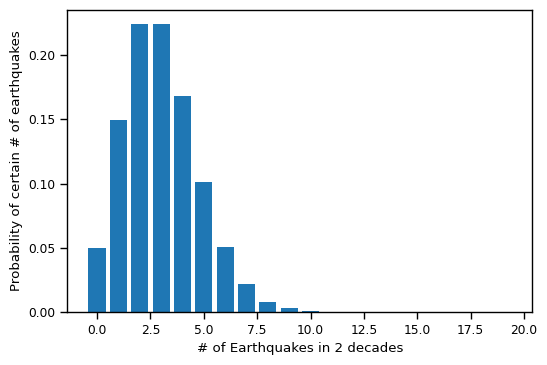

In [122]:
 Y=st.poisson(r+r)
 #sum r for 2 decades
fig, ax = plt.subplots(dpi=100)
ax.bar(k, Y.pmf(np.arange(20)))
ax.set_xlabel('# of Earthquakes in 2 decades')
ax.set_ylabel('Probability of certain # of earthquakes')

 PartC=1-Y.pmf(0)
 answer=np.round(PartC,decimals=5,out=None)
 print("Probability of at least one earthquake in 2 decades given by:\n",answer)


D. What is the probability that at least one major earthquake will occur during the next five decades?<br>
**Answer:**  Solved in Code below
<br><br><br><br><br><br><br><br>

Probability of at least one in the next 50 yrs is highly likely to occur at:
 0.99945


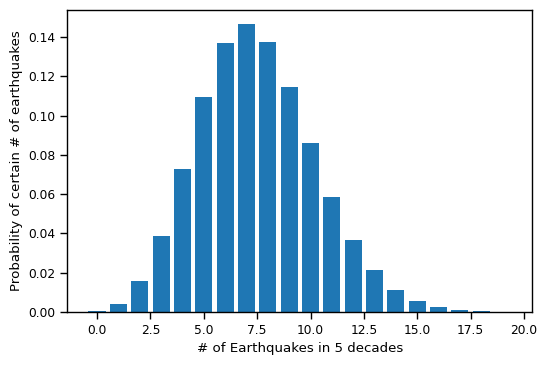

In [123]:
Z=st.poisson(5*r)
fig, ax = plt.subplots(dpi=100)
ax.bar(k, Z.pmf(np.arange(20)))
ax.set_xlabel('# of Earthquakes in 5 decades')
ax.set_ylabel('Probability of certain # of earthquakes')
zz=1-Z.pmf(0)
p50yrs=np.round(zz,decimals=5,out=None)
print("Probability of at least one in the next 50 yrs is highly likely to occur at:\n", p50yrs)

## Problem 3 - Failure of a mechanical component

Assume that you designing a gear for a mechanical system.
Under normal operating conditions the gear is expected to fail at a random time.
Let $T$ be a random variable capturing the time the gear fails.
What should the probability density of $T$ look like?
Well, when the gear is brand new, the probability density should be close to zero because a new gear does not fail under normal opearating conditions.
As time goes by, the probability density should increase because various things start happening to the material, e.g., crack formation, fatigue, etc. 
Finally, the probability density must again start going to zero as time further increases because nothing lasts forever...
A probability distribution that is commonly used to model this situation is the [Weibull](https://en.wikipedia.org/wiki/Weibull_distribution).
We are going to fit some fail time data to a Weibull distribution and then you will have to answer a few questions about failing times.

(448.066965711728, 0.7099665338918923, 3.4218808260575804, 0.41627831297126994)


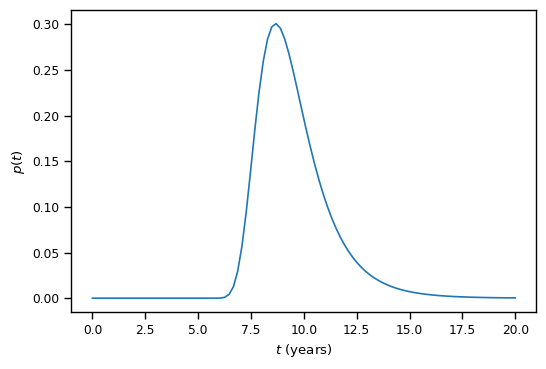

In [124]:
# Time to fail in years under normal operating conditions
# Each row is a different gear
time_to_fail_data = np.array([
    10.5,
    7.5,
    8.1,
    8.4,
    11.2,
    9.3,
    8.9,
    12.4
])

# Here is a Weibull distribution fitted to the data
fitted_params = st.exponweib.fit(time_to_fail_data, loc=0)
print(fitted_params)
T = st.exponweib(*fitted_params)
# Fit picks the parameters of the data to match the distribution
# We will talk about what it does in subsequent lectures.

# Let's plot the probability density of this
fig, ax = plt.subplots(dpi=100)
ts = np.linspace(0.0, 20.0, 100)
ax.plot(ts, T.pdf(ts))
ax.set_xlabel('$t$ (years)')
ax.set_ylabel('$p(t)$');

A. Find the mean fail time and its variance.
Hint: Do not integrate anything by hand. Just use the functionality of ``scipy.stats``.

In [125]:
#Random variable initializes, calculate mean fail time and variance with T.expect() and T.var()
print("Mean Fail Time Calculated as",T.expect())
print("Variance of T calculated as",T.var())
t_mean = 9.5288
t_var = 2.884
print('E[T] = {0:1.2f}'.format(t_mean))
print('V[T] = {0:1.2f}'.format(t_var))

Mean Fail Time Calculated as 9.528841944192884
Variance of T calculated as 2.884002267539595
E[T] = 9.53
V[T] = 2.88


B. Plot the cumulative distribution function of $T$.

Text(0.5, 1.0, '3B: CDF for Mean Time Until Failure')

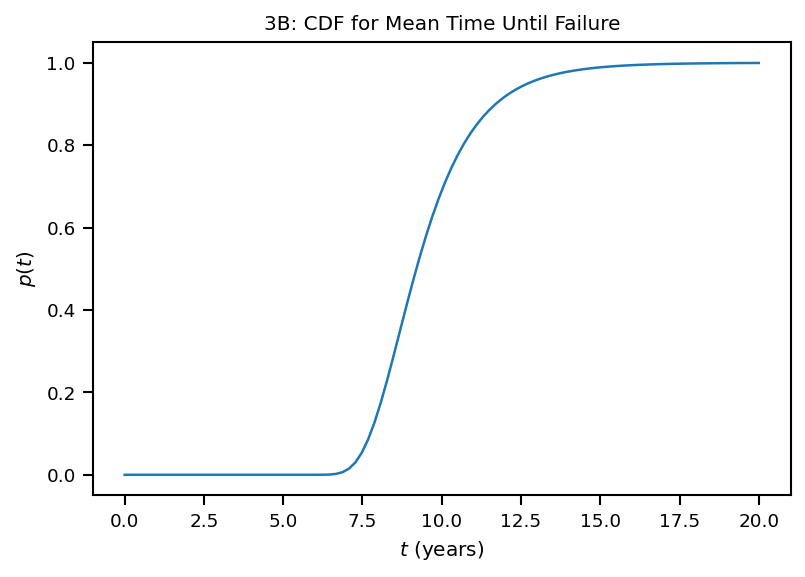

In [127]:
fig, ax = plt.subplots(dpi=150)
ts = np.linspace(0.0, 20.0, 100)
ax.plot(ts, T.cdf(ts))
ax.set_xlabel('$t$ (years)')
ax.set_ylabel('$p(t)$');
ax.set_title("3B: CDF for Mean Time Until Failure")

C. Plot the probability that gear survives for more than $t$ as a function of $t$.
That is, plot the function:
$$
S(t) = p(T > t).
$$
Hint: First connect this function to the cumulative distribution function of $T$.

In [ ]:
# St=p(T>t) = 1-cdf
# Total probability=1 and CDF=p(T <=t). Therefore we can find 1-CDF and plo
fig, ax = plt.subplots(dpi=150)
ts = np.linspace(0.0, 20.0, 100)
St=1-T.cdf(ts) #Defining the rest of the obvious rule
ax.plot(ts, St) #plot t vs. S(t)
ax.set_xlabel('$t$ (years)')
ax.set_ylabel('$p(t)$');
ax.set_title("3C: 1-T.cdf or p(T>t)")



D. Find the probability that the gear lasts anywhere between 8 and 10 years.

In [ ]:
#Probability of between 8 and 10 years - define the bounds of the analysis:
A=8
B=10
Prob=T.cdf(10)-T.cdf(8)
print('The probability of lasting between 8 and 10 years = {0:1.3f}'.format(Prob))



E. If you were to sell the gear, how many years "warranty" would you offer?<br>
**Answer:**<br>The warranty should be long enough to be attractive to the customer and give the appearance of a quality product.
However, it should not be so long as to succomb to a large number of failures within the warranty period.
If it is my choice, and perhaps it is a bit high, but I would select a 5% failure rate (or 95% pass rate) of parts
before end of warranty period. We use T.ppf() to find this. Code is below.
<br><br><br><br><br><br>

In [ ]:
The warranty should be long enough to be attractive to the customer and give the appearance of a quality product.
However, it should not be so long as to succomb to a large number of failures within the warranty period.
If it is my choice, and perhaps it is a bit high, but I would select a 5% failure rate (or 95% pass rate) of parts
before end of warranty period. We use T.ppf() to find this.
# 1-.95=0.05
WarrantyLength=T.ppf(0.05)
print("Length of Warranty set to {0:1.1f} years".format(WarrantyLength))
print('If rounding to a whole number, further reduce by a few warranty claims by stating a warranty of 7 years')

## Problem 4 - Joint probability mass function of two discrete random variables

Consider two random variables $X$ and $Y$.
$X$ takes values $\{0,1,\dots,4\}$ and $Y$ takes values $\{0,1,\dots,8\}$.
Their joint probability mass function, can be described using a matrix:

In [ ]:
P = np.array([[0.03607908, 0.03760034, 0.00503184, 0.0205082 , 0.01051408,
        0.03776221, 0.00131325, 0.03760817, 0.01770659],
       [0.03750162, 0.04317351, 0.03869997, 0.03069872, 0.02176718,
        0.04778769, 0.01021053, 0.00324185, 0.02475319],
       [0.03770951, 0.01053285, 0.01227089, 0.0339596 , 0.02296711,
        0.02187814, 0.01925662, 0.0196836 , 0.01996279],
       [0.02845139, 0.01209429, 0.02450163, 0.00874645, 0.03612603,
        0.02352593, 0.00300314, 0.00103487, 0.04071951],
       [0.00940187, 0.04633153, 0.01094094, 0.00172007, 0.00092633,
        0.02032679, 0.02536328, 0.03552956, 0.01107725]])


The rows of the matrix correspond to the values of $X$ and the columns to the values of $Y$.
So, if you wanted to find the probability of $p(X=2, Y=3)$ you would do:

A. Verify that $\sum_{x,y}p(X=x, Y=y) = 1$.

In [ ]:
# A quick way to verify is to sum up all X and Y components in the array through the np.sum function.
# This verifies that for x-values of {0...4} and Y of {0...8}, the sum of probabilities is approx 1
PXY=np.sum(P)
Pxy=np.round(PXY,decimals=7,out=None)
print("Verification:",Pxy)

B. Find the marginal probability density of $X$:
$$
p(x) = \sum_{y}p(x,y).
$$
You can represent this as a 5-dimensional vector.

In [ ]:
Xmarg=np.sum(P,1) #Selected Axis '1' to perform the sum along
#help(np.sum)
print("Marginal probability density =\n",Xmarg)
sum=np.sum(Xmarg)
print("Sum of vector elements=",sum) #Noticed that the values add to essentially 1

C. Find the marginal probability density of $Y$. This is a 9-dimensional vector.

In [ ]:
Ymarg=np.sum(P,0) #Summing along axis '0'
print("Marginal probability density =\n",Ymarg)
sum2=np.sum(Ymarg)
print("Sum of vector elements=",sum2) #Noticed that the values add to essentially 1

D. Find the expectation and variance of $X$ and $Y$.

In [ ]:
X=np.arange(5) #create array of possible X values
# Solve for Expectation using known formula
EX=X[1]*Xmarg[1]+X[2]*Xmarg[2]+X[3]*Xmarg[3]+X[4]*Xmarg[4] #first term X[0] multiplies by zero so it is not considered
print("Expectation of X =",EX)
Y=np.arange(9) #Create array of possible Y values, solve equation using long method
EY=Y[1]*Ymarg[1]+Y[2]*Ymarg[2]+Y[3]*Ymarg[3]+Y[4]*Ymarg[4]+Y[5]*Ymarg[5]+Y[6]*Ymarg[6]+Y[7]*Ymarg[7]+Y[8]*Ymarg[8]
Ey=np.round(EY,decimals=5,out=None)
print("\nExpectation of Y =",Ey)
#Find Variances
varx=(X[1]*Xmarg[1]+(X[2]**2)*Xmarg[2]+(X[3]**2)*Xmarg[3]+(X[4]**2)*Xmarg[4])-(EX**2)
Varx=np.round(varx,decimals=5,out=None)
print("\nVariance of X =",Varx)
vary=(Y[1]*Ymarg[1]+(Y[2]**2)*Ymarg[2]+(Y[3]**2)*Ymarg[3]+(Y[4]**2)*Ymarg[4]+(Y[5]**2)*Ymarg[5]+(Y[6]**2)*Ymarg[6]+(Y[7]**2)*Ymarg[7]+(Y[8]**2)*Ymarg[8])-(EY**2)
Vary=np.round(vary,decimals=5,out=None)
print("\nVariance of Y =" ,Vary)

E. Find the expectation of $E[X + Y]$.

In [ ]:
#E[X]+E[Y]
Exy=EX+EY
EXY=np.round(Exy,decimals=5,out=None)
print("E[X+Y]=",EXY)

F. Find the covariance of $X$ and $Y$. Are the two variable correlated? If yes, are they positively or negatively correlated?

In [ ]:
#Given values from previous parts of the problem for EX and EY
# We will loop over all the possible values
C_XY=0.0
for x in range(4):
    for y in range(8):
        C_XY += (x - EX) * (y - EY) * P[x, y] 
print('C[X, Y] = {0:1.3f}'.format(C_XY))
print("X and Y appear to be slightly positively correlated.")

G. Find the variance of $X + Y$.

In [ ]:
# Variance of X+Y = V[X]+V[Y]+2C[X,Y]
VXandY=Varx+Vary+2*C_XY
print("The variance of X + Y is found to be {0:1.2f}".format(VXandY))
print('Which is different from just the sum of the individual variances')

J. Find the probability that $X+Y$ is less than or equal to 5.
That is, find $p(X + Y \le 5)$.
Hint: Use two for loops to go over all the combinations of $X$ and $Y$ values, check if $X+Y\le 5$, and sum up the probabilities.

In [ ]:
for x in range(4):
  for y in range (8):
    if x+y <=5:
      print("An eligible value is", P[x,y])   

sumprob=0.478856909
sum=np.round(sumprob,decimals=5,out=None)
print('Sum of probability when X + Y <= 5 is',sum)

## Problem 5 - Creating a stochastic model for the magnetic properties of steel

The magnetic properties of steel are captured in the so called [$B-H$ curve](https://en.wikipedia.org/wiki/Saturation_(magnetic)) which connects the magnetic field $H$ to the magnetic flux density $B$.
The shape of this curve depends on the manufacturing process of the steel. As a result the $B-H$ differs across different suppliers but alos across time for the same supplier.

Let's use some real manufacturer data to visualize these differences.
The data are [here](https://github.com/PredictiveScienceLab/data-analytics-se/raw/master/homework/B_data.csv).
It will take a while to explain how to upload data on Google Colab.
We will do it in the next homework set.
For now, you should just know that the data file ``B_data.csv`` needs to be in the same working directory as this Jupyter notebook.
We have written a piece of code that allows you to put the data file in the right place without too much trouble.
Simply run the following:

In [ ]:
url = 'https://github.com/PredictiveScienceLab/data-analytics-se/raw/master/homework/B_data.csv'
download(url)

If everything worked well, then the following will work:

In [ ]:
# Load the data - You need the B_data.csv
B_data = np.loadtxt('B_data.csv')
# This file contains a single matrix the shape of which is:
print(B_data.shape)

The rows (200) corresponds to different samples of the $B-H$ curves (different suppliers and different times).
The columns (1500) corresponds to different values of $H$.
That is, the $i, j$ element is the value of $B$ at the a specific value of $H$, say $H_j$. The values of $H$ are the equidistant and identical and we are going to ignore them in this analysis.
Let's visualize some of the samples.

In [ ]:
# Here is one sample
fig, ax = plt.subplots(dpi=100)
ax.plot(B_data[0, :])
ax.set_xlabel('Index $j$')
ax.set_ylabel('$B$ (T)');

In [ ]:
# Here are five samples
fig, ax = plt.subplots(dpi=100)
ax.plot(B_data[:5, :].T)
ax.set_xlabel('Index $j$')
ax.set_ylabel('$B$ (T)');

In [ ]:
# Here are all the samples
fig, ax = plt.subplots(dpi=100)
ax.plot(B_data[:, :].T, 'r', lw=0.1)
ax.set_xlabel('Index $j$')
ax.set_ylabel('$B$ (T)');

A. We are going to start by studying the data at only one index. Say index $j=500$.
Let's define a random variable
$$
X = B(H_{500}),
$$
for this reason. Extract and do a histogram of the data for $X$:

In [ ]:
X_data = B_data[:, 500]
fig, ax = plt.subplots(dpi=100)
ax.hist(X_data, alpha=0.5, density=True)
ax.set_xlabel('$x$')
ax.set_ylabel('Histogram');


This looks like a Gaussian $N(\mu_{500}, \sigma_{500}^2)$. Let's try to find a mean and variance for that Gaussian.
We are not going to explain why, but a good choice for the mean is the empirical average of the data:
$$
\mu_j = \frac{1}{N}\sum_{i=1}^NB_{ij}.
$$
That is:

In [ ]:
mu_500 = X_data.mean()
print('mu_500 = {0:1.2f}'.format(mu_500))

Similarly, for the variance a good choice is the empirical variance defined by:
$$
\sigma_j^2 = \frac{1}{N}\sum_{i=1}^N(B_{ij} - \mu_j)^2.
$$
That is:

In [ ]:
sigma2_500 = np.var(X_data)#.var()
print('sigma_500 = {0:1.2e}'.format(sigma2_500))

Repeat the plot of the histogram of $X$ along with the PDF of the normal variable we have just identified using the functionality of ``scipy.stats``.

In [ ]:
Xdata = B_data[:, 500]
mean, stdev = st.norm.fit(Xdata)
print("Mean is {0:1.4f}".format(mean))
print("Standard Deviation is {0:1.5f}".format(stdev))
PDF = st.norm.pdf(Xdata, mean, var)
plt.hist(Xdata, density=True)
plt.plot(Xdata,PDF,'rx') 
plt.xlabel("Histogram")
plt.ylabel("x")
plt.title('\n Histogram and PDF of Normal Variable X using Scipy')


B. Using your normal approximation to the PDF of $X$, find the probability that $X = B(H_{500})$ is geater than 1.66 T.

In [ ]:
CDF=st.norm.cdf(1.66, loc=1.6104, scale=0.02724) #Inputs are target value, loc=mean, and scale=stdev solved in Part A
print("CDF yields {0:1.4f}".format(CDF))
ProbX=1-CDF
print('Probability that X=B(H500) is greater than 1.66T={0:1.4f}'.format(ProbX))


C. Let us now consider another random variable
$$
Y = B(H_{1000}).
$$
Isolate the data for this as well:

In [ ]:
Y_data = B_data[:, 1000]

Do the ``scatter`` plot of $X$ and $Y$:

In [ ]:
fig, ax = plt.subplots(dpi=125)
ax.scatter(X_data, Y_data)
ax.set_xlabel("$X data$ $B(H500)$")
ax.set_ylabel("$Y data$ $B(H1000)$")
ax.set_title('Scatter Plot of X and Y with visible correlation')


D. From the scatter plot, it looks like the random vector
$$
\mathbf{X} = (X, Y),
$$
follows a multivariate normal distribution. What would be the mean and covariance of the distribution.
Well, first organize the samples of $X$ and $Y$ in a matrix with the number of rows being the number of samples and two columns (one corresponding to $X$ and one to $Y$).

In [ ]:
XY_data = np.hstack([X_data[:, None], Y_data[:, None]])

The mean vector is:

In [ ]:
mu_XY = np.mean(XY_data, axis=0)
print(mu_XY)

The covariance matrix is a little bit trickier. 
We have already discussed how to find the diagonals of the covariance matrix (it is simply the variance).
For the off-diagonal terms, this is the formula that is being used:
$$
C_{jk} = \frac{1}{N}\sum_{i=1}^N(B_{ij} - \mu_j)(B_{ik} - \mu_k).
$$
This is how you can find it:

In [ ]:
# Careful with np.cov because it requires you to transpose the matrix
C_XY = np.cov(XY_data.T)
print(C_XY)

Are the two variables $X$ and $Y$ positively or negatively correlated?<br>
**Answer:**
<br><br> From the matrix, the variables X and Y appear to be $positively$ $correlated$

E. Use ``np.linalg.eigh`` to check that the matrix ``C_XY`` is indeed positive definite.

In [ ]:
POSDEF=np.linalg.eigh(C_XY)
print("The function returned:\n", POSDEF)
# per scipy.stats info, the return from the function is an array of 
# eigenvalues in descending order, followed by the eigenvectors.
# The eigenvalues are small but both positive
print("\nEigenvalues are small but positive, matrix is positive definite.")


F. Use the functionality of ``scipy.stats.multivariate_normal`` to plot the joint probability function of the samples of $X$ and $Y$ in the same plot as the scatter plot of $X$ and $Y$.

In [ ]:
X = st.multivariate_normal(mean=mu_XY, cov=C_XY)
fig, ax = plt.subplots(dpi=150)

xx = np.linspace(1.52, 1.68, 200)
yy = np.linspace(1.6, 1.8, 200)
XX, YY = np.meshgrid(xx, yy)
Xf = np.hstack([XX.flatten()[:, None], YY.flatten()[:, None]])
jpdf = X.pdf(Xf).reshape(XX.shape) #Calculating PDF
c = ax.contour(XX, YY, jpdf) # Plotting Contours
plt.colorbar(c, label='$p(\mathbf{x,y})$')
ax.plot(X_data,Y_data,'.', markersize=2)
ax.plot(mu_XY[0], mu_XY[1], 'ro'); #Plot of the mean
ax.set_xlabel('B500')
ax.set_ylabel('B1000')
ax.set_title('Joint Probability Function of Samples X and Y with Scatter Plot and Mean Designated')


G. Now, let's think each $B-H$ curve as a random vector.
That is, the random vector $\mathbf{B}$ corresponds to the values of the magnetic flux density at a fixed number of $H$-values. It is:
$$
\mathbf{B} = (B(H_1), \dots, B(H_{1500})).
$$
It is like $\mathbf{X} = (X, Y)$ only now we have 1500 dimensions instead of $2$.
First, let's find the mean of this random vector:

In [ ]:
B_mu = np.mean(B_data, axis=0)
# Let's plot the mean on top of the data
# Here are all the samples
fig, ax = plt.subplots(dpi=100)
ax.plot(B_data[:, :].T, 'r', lw=0.1)
ax.plot(B_mu)
ax.set_xlabel('Index $j$')
ax.set_ylabel('$B$ (T)');

It looks good. Now, find the covariance matrix of $\mathbf{B}$. This is going to be a 1500x1500 matrix.

In [ ]:
B_cov = np.cov(B_data.T)

Let's plot this matrix:

In [ ]:
fig, ax = plt.subplots(dpi=100)
c = ax.imshow(B_cov, interpolation='nearest')
plt.colorbar(c)

You see that the values are quite a bit correlated. This makes sense because the curves are all very smooth and they look very much alike. But let's check if the covariance is indeed positive definite:

In [ ]:
print('Eigenvalues of B_cov:')
print(np.linalg.eigh(B_cov)[0])

Hmm, notice that there are several eigenvalues that are negative, but they are too small. Very close to zero. This happens very often in practice when you are finding the covariance of a very large random vectors. It arises from the fact that we are using floating point arithmetic instead of a real numbers. It is a numerical artifact.
If you tried to use this covariance to make a multivariate normal random vector using ``scipy.stats`` it would fail.
Try this:

In [ ]:
B = st.multivariate_normal(mean=B_mu, cov=B_cov)

The way to overcome this problem is to add a small positive number to the diagonal. This needs to be very small so that the distribution does not change very much. It must be the smallest possible number that makes the covariance matrix behave well. This is known as the *jitter* or the *nugget*. Find the nugget playing with the code below. Every time you try, multiply the nugget by ten.

In [ ]:
# Pick the nugget here
nugget = 1e-9
print("THE SUCCESSFUL NUGGET VALUE WAS 1.0e-9")
# This is the modified covariance matrix
B_cov_w_nugget = B_cov + nugget * np.eye(B_cov.shape[0])
# Try building the distribution:
try:
    B = st.multivariate_normal(mean=B_mu, cov=B_cov_w_nugget)
    print('It worked! Move on.')
except:
    print('It did not work. Increase nugget by 10.')

H. Now you have created your first stochastic model of a complicated physical quantity. By sampling from your newly constructed random vector $\mathbf{B}$ you have essentially quantified your uncertainty about the $B-H$ curve as induced by the inability to perfectly control the production of steel. Take 10 samples of this random vector and plot them.

In [ ]:
b_samples=B.rvs(10)
fig, ax = plt.subplots(dpi=100)
ax.plot(b_samples.T) #transpose the array
ax.set_xlabel('Index $j$')
ax.set_ylabel('$B$ (T)');
ax.set_title('Plot of 10 samples from Random Vector B')
Shape=np.shape(b_samples)
